In [1]:
from gamearg import *
from IPython.display import display, Image

## Facts Define

In [2]:
%%file files/test.lp
move(a,c).
move(b,c).
move(c,d1).
move(c,d2).
move(d1,d2).
move(d2,d1).
move(d1,e).
move(g,e).
move(e,f).
move(f,g).

Overwriting files/test.lp


**Note**: For the given example, if you change the `reverse` paramater to `True` you will get 4 possible worlds below; `False` results in 2 possible worlds.

In [3]:
# You only need edit this cell
input_file = "files/test.lp"
keyword = "arg" #arg or game depends on the graphvis_settings.json
reverse = True  # whether you want to reverse the edge direction

## Show Plain Graph

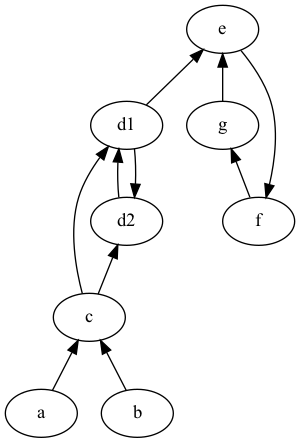

In [4]:
show_plain(input_file, keyword, reverse)

## Well-Founded Semantics

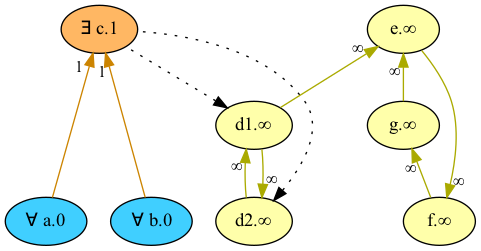

In [5]:
show_wfs(input_file, keyword, reverse)

## Stable Models

In [6]:
show_stb(input_file, keyword, reverse)

In [7]:
wfs_stb_pws, df_wfs_stb = node_stb_cal(input_file, keyword, reverse)

In [8]:
df_wfs_stb

,node,state_id,wfs,pw_1
0,a,0,accepted,accepted
1,b,0,accepted,accepted
2,c,1,defeated,defeated
3,d1,∞,undefined,accepted
4,d2,∞,undefined,defeated
5,e,∞,undefined,defeated
6,f,∞,undefined,accepted
7,g,∞,undefined,defeated


In [9]:
if keyword=="game":
    status_1="lost"
    status_2="won"
else:
    status_1="accepted"
    status_2="defeated"
count_columns = [col for col in df_wfs_stb.columns if col.startswith('pw_')]
df_wfs_stb[f'{status_1}_count'] = df_wfs_stb[count_columns].apply(lambda row: sum(row == status_1), axis=1)
df_wfs_stb[f'{status_2}_count'] = df_wfs_stb[count_columns].apply(lambda row: sum(row == status_2), axis=1)
aggregated_counts = df_wfs_stb.groupby('node').agg({f'{status_1}_count': 'sum', f'{status_2}_count': 'sum'}).reset_index()

aggregated_counts

,node,accepted_count,defeated_count
0,a,1,0
1,b,1,0
2,c,0,1
3,d1,1,0
4,d2,0,1
5,e,0,1
6,f,1,0
7,g,0,1
